In [48]:
# !pip install matplotlib ipympl
import numpy as np
from matplotlib import pyplot as plt
import source.ml.ga_storage as s
%matplotlib widget

In [49]:
f = './results/ex3_partial_fracture_P10_R35[2023-03-06][13-19]/'

In [50]:
S = s.Database(s.SimpleStorage(), f)
G = S.loadAll()
D = S.fitness(G)
P = S.parameters(G)

0
population=10 generations=18 best@4=48.89598 worst@4=50.91579


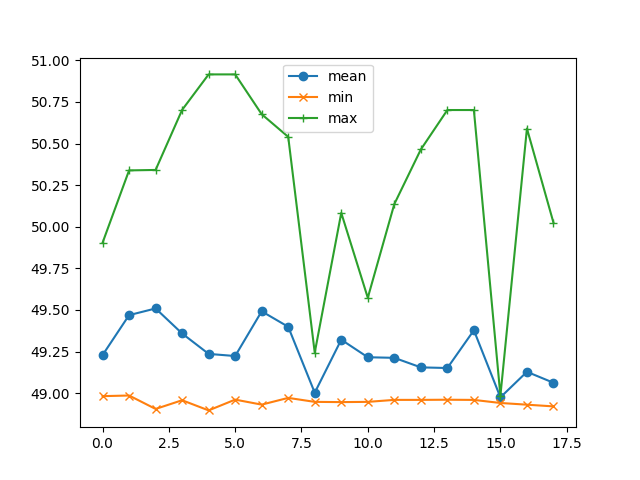

In [53]:

def U(i): return np.unravel_index(i, D.shape)  # type: ignore

print((D == 1E10).sum())
D[D == 1E10] = np.nan

gen, pop = D.shape
best = U(D.argmin())
worst = U(D.argmax())
print(
    f"population={pop}",
    f"generations={gen}",
    f"best@{best[0]}={D[best]:.5f}",
    f"worst@{worst[0]}={D[worst]:.5f}",
)

D.sort(axis=1)
R = (pop//5) + (pop%5)
S = D[:,:-R]

fig = plt.figure()
_ = {'axis': 1}
plt.plot(D.mean(**_), label="mean", marker='o')
plt.plot(D.min(**_), label="min", marker='x')
plt.plot(D.max(**_), label="max", marker='+')
# plt.plot(S.max(**_), label="smooth-max")
# plt.plot(S.mean(**_), label="smooth-mean")
# plt.yscale('log')
plt.legend()
# display(fig)

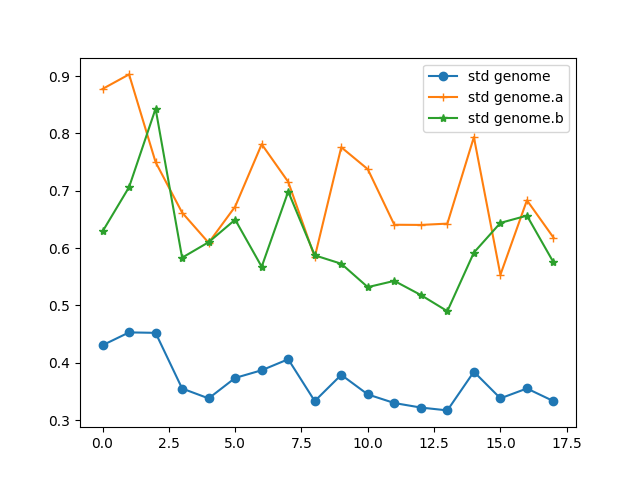

In [55]:
fig = plt.figure()
S = P.std(axis=1)
A = np.linalg.norm(S[:, :3], axis=1)
B = np.linalg.norm(S[:, 3:], axis=1)
plt.plot(S.mean(axis=1), label="std genome", marker='o')
plt.plot(A, label="std genome.a", marker='+')
plt.plot(B, label="std genome.b", marker='*')
# plt.plot(P.mean(axis=1).mean(axis=1), label="population-mean")
# plt.yscale('log')
plt.legend()
# display(fig)